# Protein repeat design
In this document we test additional features of the RepeatDesigner package beyond running an optimization of the protein sequence. Here we explore the presence of repeats, how these are encoded in the package, and how we give weights inside a composite scoring function.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from repeatdesigner import designer as rd

In [3]:
targets = [25, 26, 28, 29, 32, 33, 34, 42, 44, 45, 48, 49, 52, 53, 55, 56]
repeats = [(2,34), \
           (36,68), \
          (70,102)]
for r in repeats:
    print r[0],r[1]
tpr_des = rd.Repeat(pdb="pdbs/3atb.pdb", repeats=repeats)

2 34
36 68
70 102
 Generated new protein design 
 .. name : pdbs/3atb
 .. file : pdbs/3atb.pdb
 .. sequence : NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
 .. target residues :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]


In [4]:
reps = []
for r in repeats:
    reps.append(type(tpr_des.seq[r[0]:r[-1]]))
try:
    assert reps[0] == reps[1]
except AssertionError:
    print "AssertionError: sequences are not equal"

In [9]:
mc_tpr = rd.Optimizer(tpr_des, beta=0.01, len_mc=1, nruns=1)

In [22]:
mc_tpr.run_mc()

 Run #0
 I am a repeat protein!
>> Model assessment by DOPE potential
DOPE score               : -13863.834961
NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG 93 HIS
NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYHQKALELDPNNAEAKQDLGNAKQKQG
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
/var/folders/yg/f82gg6x97m1d737h6pl80_fr0000gn/T/mut_OfAloH.fasta.B99990001.pdb      606.61035

>> Model assessment by DOPE potential
DOPE score               : -13432.796875
Finding mutating residue in repeat
>> Model assessment by DOPE potential
DOPE score               : -2003.125732
23
 Building competing mo

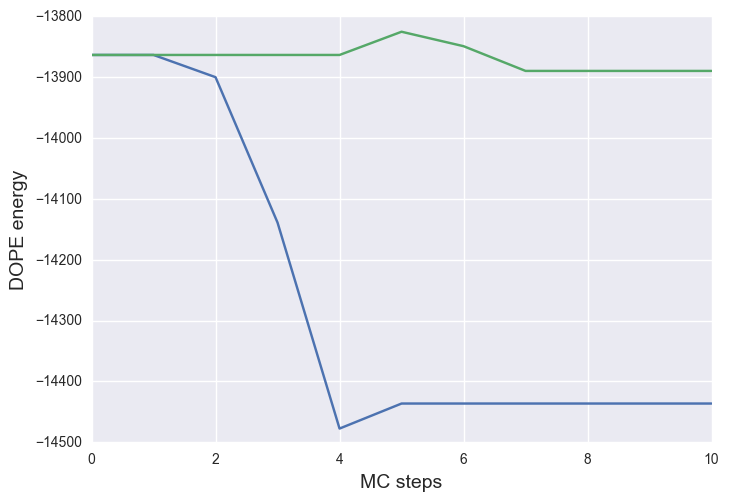

In [7]:
fig, ax = plt.subplots()
for k,v in mc_tpr.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)